<hr/>
<div style="display: block; margin: 50px 0 50px 0; margin-left: 5%">
<h1 style="text-align: left;">Francy - An Interactive Discrete Mathematics Framework for GAP</h1>
</div>

<hr/>
<div style="display: block; margin: 50px 0 50px 0">
    <div style="text-align: left; float: left;">
        <h2>Manuel Martins</h2>
        <h3>Universidade Aberta, Lisbon - Portugal</h3>
        <h4>manuelmachadomartins@gmail.com</h4>
    </div>
    <div style="text-align: left; float: right;">
        <h2>Markus Pfeiffer</h2>
        <h3>University of St Andrews, St Andrews - Scotland</h3>
        <h4>markus.pfeiffer@morphism.de</h4>
    </div>
</div>

<hr/>
<div style="display: block; margin: 50px 0 50px 0">
<h1 style="text-align: center">Agenda</h1>

<h3>
    <ol type="1">
    <li>Motivation</li>
    <li>Solution</li>
    <li>Features</li>
    <li>Hands-on</li>
    <li>Future</li>
    </ol>
</h3>
</div>

<hr/>
<div style="display: block; margin: 50px 0 50px 0">
<h1 style="text-align: center">1. Motivation</h1>

<h3><ul><li>Francy arose from the necessity of having a lightweight framework for building interactive graphics, generated from GAP, running primarily on the web, primarily in a Jupyter Notebook.</li></ul></h3>

<h2 style="text-align: left; margin-left: 10%">1.1 What is Francy?</h2>

<h3>
<ul>
    <li>an interface to draw graphics using objects;</li>
    <li>based on simple concepts of drawing and graph theory;</li>
    <li>2 components:</li>
    <ol type="1">
        <li>a GAP package that is responsible for the semantic representation of graphics;</li>
        <li>a GUI library that is responsible for generating the actual interactive graphical representation.</li>
    </ol>
</ul>
</h3>
</div>

<hr/>
<div style="display: block; margin: 50px 0 50px 0">
<h1 style="text-align: center">2. Solution</h1>

<h2 style="text-align: left; margin-left: 10%">2.1 GAP Package</h2>

<h3>
<ul>
    <li>provides a semantic representation of graphics is provided by a thin layer.</li>
    <li>uses JSON, a lightweight, text-based, language-independent data interchange format.</li>
    <li>follows a JSON Schema, and is identified with the application/vnd.francy+json MIME type.</li>
</ul>
</h3>

<h2 style="text-align: left; margin-left: 10%">2.2 GUI Library - Javascript</h2>

<h3>
<ul>
    <li>based on d3.js, for rendering the semantic representation produced by the GAP package;</li>
    <li>this library is distributed both as a browser module and as a Jupyter extension.</li>
</ul>
</h3>

<h2 style="text-align: left; margin-left: 10%">2.3 Jupyter GAP Kernel</h2>

<h3>
<ul>
    <li>pure GAP package that implements the Jupyter Kernel specification;</li>
    <li>"glues" everything together.</li>
</ul>
</h3>

<h3>
The Jupyter extension can be used in Jupyter Notebooks or Jupyter Lab, using the Jupyter GAP Kernel and the MIME type application/vnd.francy+json to render the document.
</h3>
<h3>
This creates an abstraction and allows the development of new GUI libraries, 
using different data rendering dependencies or even different programming languages, independently of the GAP package.
</h3>
</div>

<hr/>
<div style="display: block; margin: 50px 0 0 0">
<h1 style="text-align: center">3. Features</h1>

<h3>
<ul>
    <li>allows the creation of directed and undirected graphs, trees, line charts, bar charts and scatter charts;</li>
    <li>enables interaction with graphical objects by clicking, selecting, dragging and zooming;</li>
</ul>
</h3>
<h2 style="text-align: left; margin-left: 10%">3.1 How to install</h2>
</div>

### 1. download latest release and extract the GAP package to GAP packages directory

```bash
user@local:~$ wget https://github.com/mcmartins/francy/archive/v0.8.2.tar.gz && \
    mkdir -p $GAPROOT/pkg/francy && \
    tar xzvf v0.8.2.tar.gz -C $GAPROOT/pkg/francy francy-0.8.2/gap
```

### 2. install latest jupyter extension using pip and install on Jupyter lab and/or notebook

```bash
user@local:~$ pip install jupyter_francy
user@local:~$ jupyter lab build # for JupyterLab
user@local:~$ jupyter nbextension enable --py --sys-prefix jupyter_francy # for Notebook
```
<div style="display: block; margin: 0 0 50px 0"/>

<hr/>
<div style="display: block; margin: 50px 0 50px 0">
<h1 style="text-align: center">4. Hands-on</h1>
</div>

In [ ]:
LoadPackage("francy");
LoadPackage("digraph");

true

true

In [3]:
FrancyDigraphs := function(G)
    local as, d, v, e, graph, nodes, m, IsGroupSimple, canvas, i, graphviz;

    as := AllSubgroups(G);

    d := Digraph(as, {H, K} -> IsSubgroup(H, K));;
    v := DigraphVertices(d);;
    e := DigraphEdges(d);;

    graph := Graph(GraphType.DIRECTED);;
    canvas := Canvas(Concatenation("Subgroups Digraph of ", String(G)));;
    Add(canvas, graph);;

    nodes := [];;

    m := FrancyMessage(FrancyMessageType.INFO, "Simple Groups", 
        "A group is simple if it is nontrivial and has no nontrivial normal subgroups.");;
    
    IsGroupSimple := function(i)
        Add(canvas, m);;
        if IsSimpleGroup(as[i]) then
            Add(canvas, FrancyMessage("Simple", Concatenation("The vertex ", 
                String(i), ", representing the subgroup ", String(as[i]), ", is simple.")));;
        else
            Add(canvas, FrancyMessage("Not Simple", Concatenation("The vertex ", 
                String(i), ", representing the subgroup ", String(as[i]), ", is not simple.")));;
        fi;;
        return Draw(canvas);
    end;;

    for i in v do
        nodes[i] := Shape(ShapeType.CIRCLE, String(i));;
        Add(nodes[i], Menu("Simple", Callback(IsGroupSimple, [i])));;
        Add(graph, nodes[i]);;
    od;;

    for i in e do
        Add(graph, Link(nodes[i[1]], nodes[i[2]]));;
    od;;
    
    graphviz := FrancyRenderer(FrancyRendererType.GRAPHVIZ_DOT);
    Add(canvas, graphviz);

    return Draw(canvas);
end;

function( G ) ... end

In [4]:
G := DihedralGroup(4);

<pc group of size 4 with 2 generators>

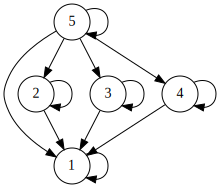

In [5]:
JupyterSplashDot(DotDigraph(Digraph(AllSubgroups(G), {H, K} -> IsSubgroup(H, K))));

In [6]:
FrancyDigraphs(G);

<h2 style="text-align: left; margin-left: 10%">4.1 More examples</h2>

<h3>Try these notebooks:</h3>

1. [Francy Features](francy-features.ipynb)
2. [Subgroup Lattice](subgroup-lattice.ipynb)
3. [Francy Monoids](francy-monoids.ipynb)

<hr/>
<div style="display: block; margin: 50px 0 50px 0">
<h1 style="text-align: center">5. Future</h1>

<h3>
<ul>
    <li>rendering multiple topological graphs on the same canvas.</li>
    <li>allow the creation of "free graphics" using lines and text.</li>
    <li>introduce new concepts like tables for matrices representations.</li>
    <li>validate the JSON against its JSON Schema between GAP and GUI.</li>
    <li>rendering is done on SVG which might be "heavy" when loading huge graphs.</li>
<ul>
</h3>
</div>

<hr/>
<div style="display: block; margin: 50px 0 50px 0">
<h1 style="text-align: center">Questions?</h1>
<br/>
<h1 style="margin-left: 10%">Thanks!</h1>
</div>